#### Мажник Павел, 792

### ДЗ 1. Свойства оценок.
#### Задача 1.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

1. Сгенерируйте выборку $X_1, ..., X_N$ из равномерного распределения
 на отрезке $[0, \theta]$ для $N = 10^4.$ Для всех $n\leq N$
посчитайте оценки параметра $\theta$ из теоретической задачи:
$2\overline{X},$ $\overline{X} + \frac{X_{(n)}}{2},$ $(n + 1)X_{(1)},$
$X_{(1)} + X_{(n)},$ $\frac{n+1}{n}X_{(n)}.$ Постройте на одном
графике разными цветами для всех оценок функции модуля разности
оценки и истинного значения $\theta$ в зависимости от $n.$ Если
некоторые оценки (при фиксированном значении $n$) сильно отличаются
от истинного значения параметра $\theta,$ то исключите их и
постройте еще один график со всеми кривыми (для измененного
значения $\theta$). Для избавления от больших значений разности в
начале ограничьте масштаб графика. Для наглядности точки можно
соединить линиями. Какая оценка получилась лучше (в смысле
упомянутого модуля разности при $n = N$)? Проведите эксперимент для
разных значений $\theta$ (количество графиков равно количеству
значений $\theta$).

Sample: [0.87155803 0.73208136 0.57134115 ... 0.13418647 0.78659206 0.77645593]


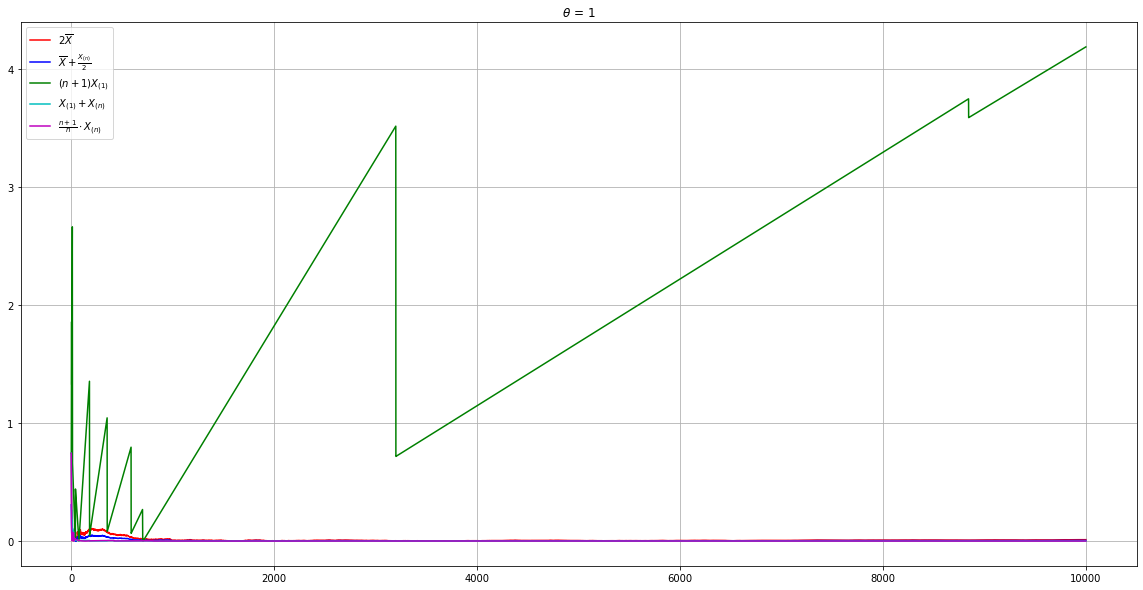

In [93]:
N = 10000

def estimates(theta):
    # Сгенерируем выборку:
    sample = uniform.rvs(size=N, scale=theta)
    print("Sample:", sample)
    
    # Для всех n <= N посчитаем оценки параметра theta из теоретической задачи:
    est = [np.zeros(N) for i in range(0, 5)]
    for n in range(1, N + 1):
        mean = np.mean(sample[:n])
        est[0][n - 1] = 2 * mean
        est[1][n - 1] = mean + sample[:n].max() / 2
        est[2][n - 1] = (n + 1) * sample[:n].min()
        est[3][n - 1] = sample[:n].min() + sample[:n].max()
        est[4][n - 1] = (n + 1) * sample[:n].max() / n
    return est

theta = 1
est = estimates(theta)
# Построим на одном графике
# функции модуля разности оценки и истинного значения 𝜃 в зависимости от 𝑛.
plt.figure(figsize=(20, 10))
plt.plot(np.abs(est[0] - theta), 'r', label=r'2$\overline{X}$')
plt.plot(np.abs(est[1] - theta), 'b', label=r'$\overline{X} + \frac{X_{(n)}}{2}$')
plt.plot(np.abs(est[2] - theta), 'g', label=r'$(n + 1)X_{(1)}$')
plt.plot(np.abs(est[3] - theta), 'c', label=r'$X_{(1)} + X_{(n)}$')
plt.plot(np.abs(est[4] - theta), 'm', label=r'$\frac{n + 1}{n} \cdot X_{(n)}$')
plt.title(r'$\theta$ = ' + str(theta))
plt.legend()
plt.grid()
plt.show()

Из графика видно, что оценка $(n + 1)X_{(1)}$ сильно отличаeтся от истинного значения параметра $\theta,$ что неудивительно, т.к. она является несостоятельной. Исключим её и
построим еще один график в увеличенном масштабе (для $\theta = 50$).

Sample: [29.39021511 32.12788226 28.06328042 ... 15.46741632 40.61506253
 48.84537493]


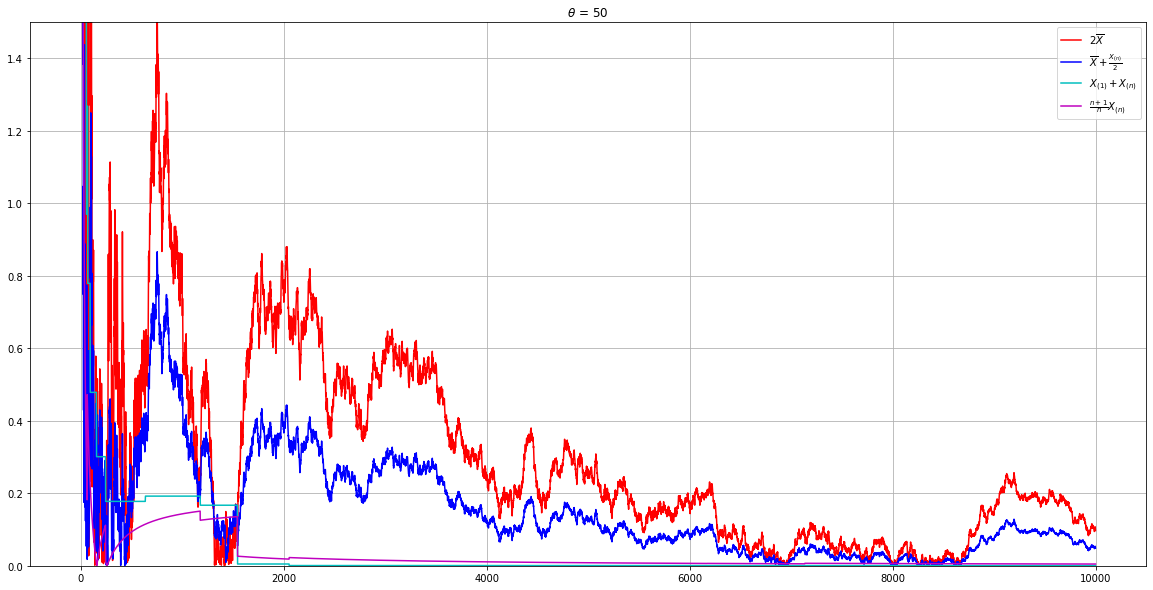

In [96]:
theta = 50
est = estimates(theta)
# Увеличим масштаб
plt.figure(figsize=(20, 10))
plt.ylim(0, 1.5)
plt.plot(np.abs(est[0] - theta), 'r', label=r'2$\overline{X}$')
plt.plot(np.abs(est[1] - theta), 'b', label=r'$\overline{X} + \frac{X_{(n)}}{2}$')
# plt.plot(np.abs(est[2] - theta), 'g', label=r'${(n + 1)}X_{(1)}$')
plt.plot(np.abs(est[3] - theta), 'c', label=r'$X_{(1)} + X_{(n)}$')
plt.plot(np.abs(est[4] - theta), 'm', label=r'$\frac{n+1}{n}X_{(n)}$')
plt.title(r'$\theta$ = ' + str(theta))
plt.legend()
plt.grid()
plt.show()

Оценки 2$\overline{X}$ и $\overline{X} + \frac{X_{(n)}}{2}$ также сильно отличаются от значения $\theta,$ поэтому исключим и их.

Построим графики для различных $\theta$

Sample: [6.22597071 6.97908416 1.16229887 ... 2.01499207 0.174359   0.81627918]


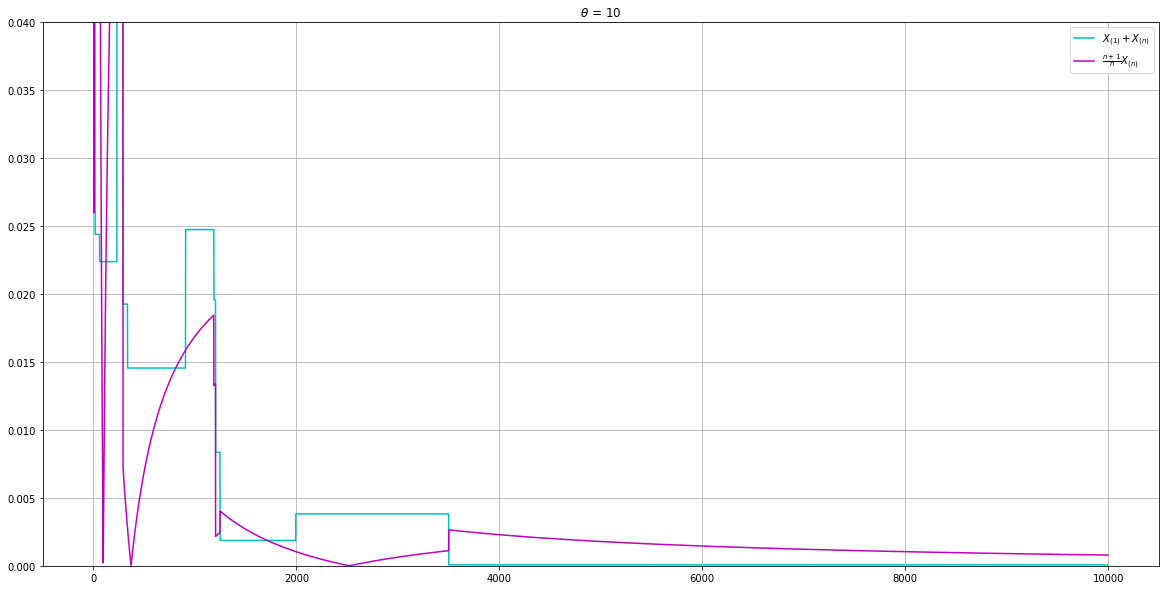

Sample: [13.0256795  60.91042852 23.37483033 ... 66.63239214 14.49094678
 71.15619495]


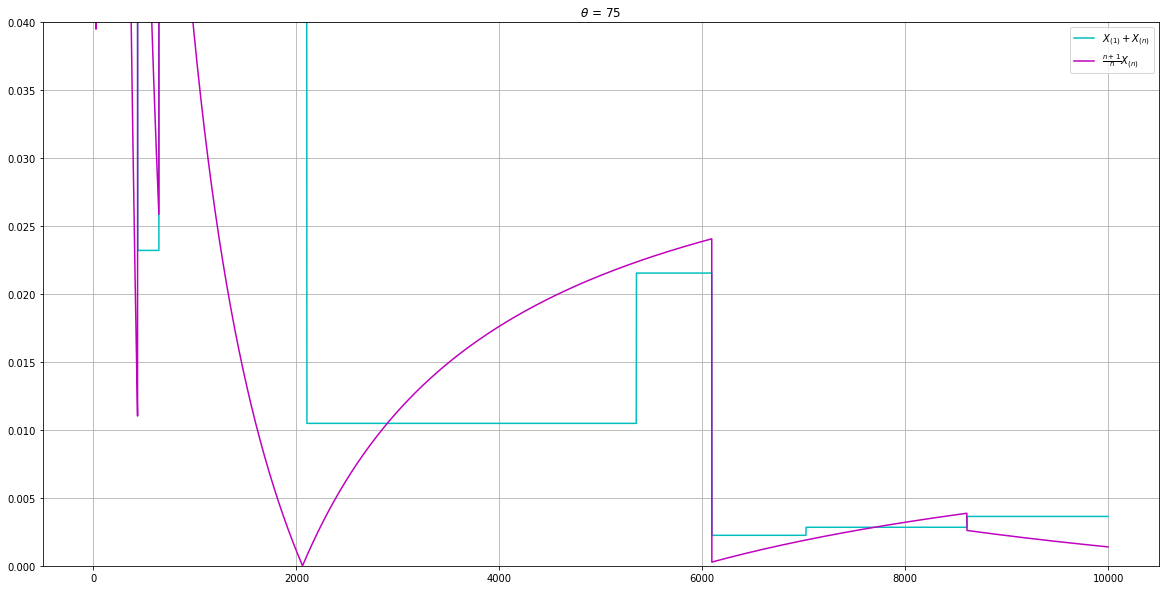

Sample: [54.30498999 38.45752228 35.90644038 ... 49.63133033 72.65690934
 83.77431878]


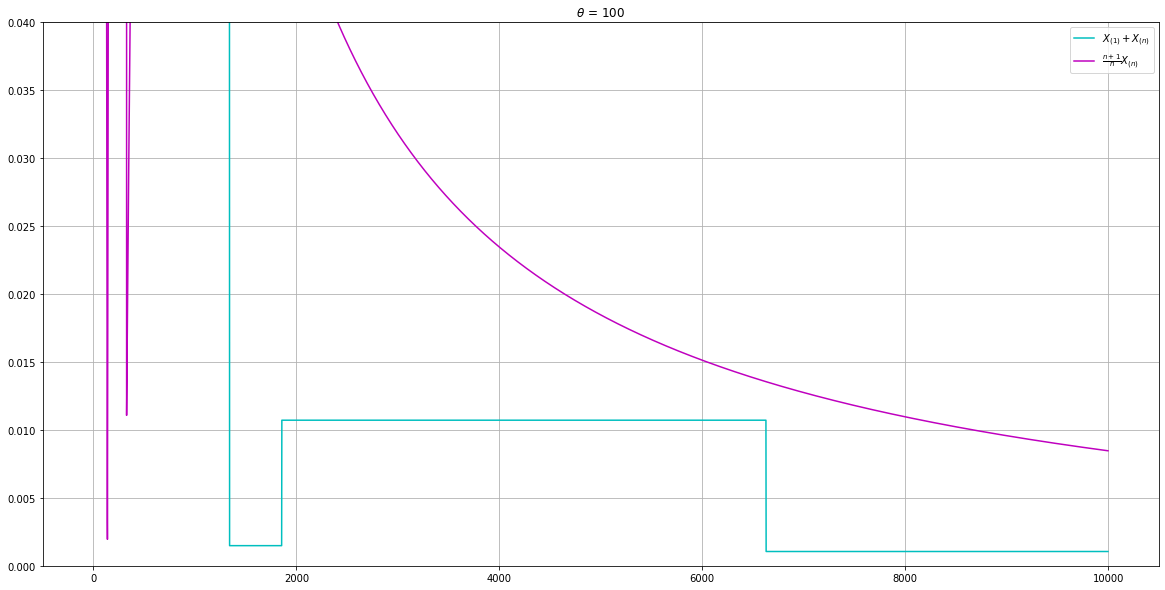

Sample: [ 12.19713686 109.49237082  60.08292998 ...  69.91735066  48.28735326
  38.55329631]


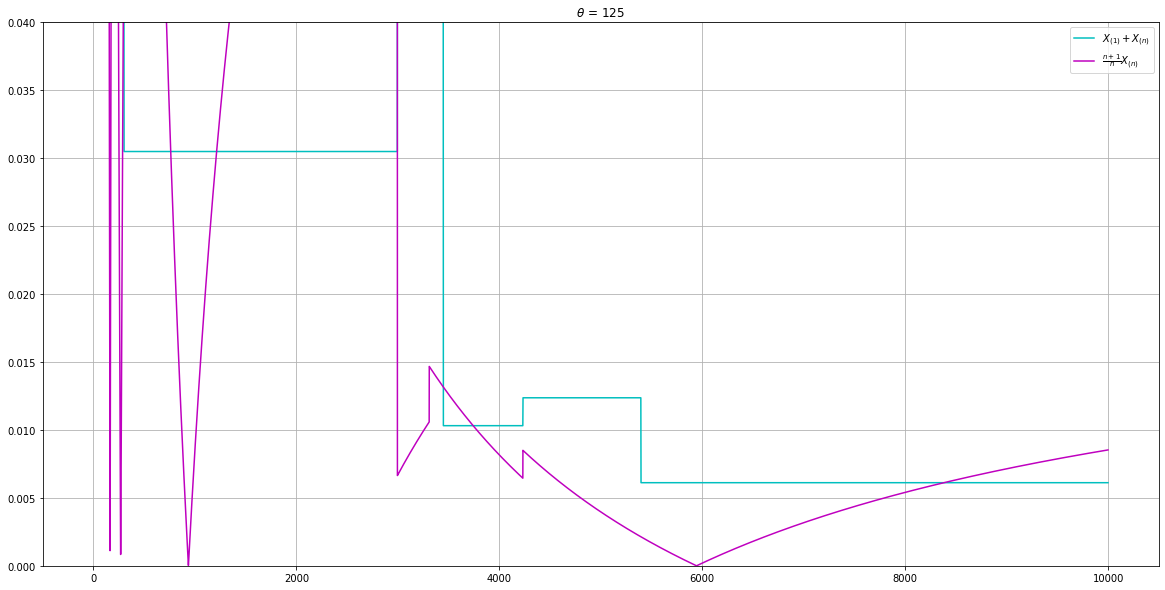

Sample: [ 98.72315542 118.74265189 104.02916147 ...   6.14993007 120.51201548
 117.79684615]


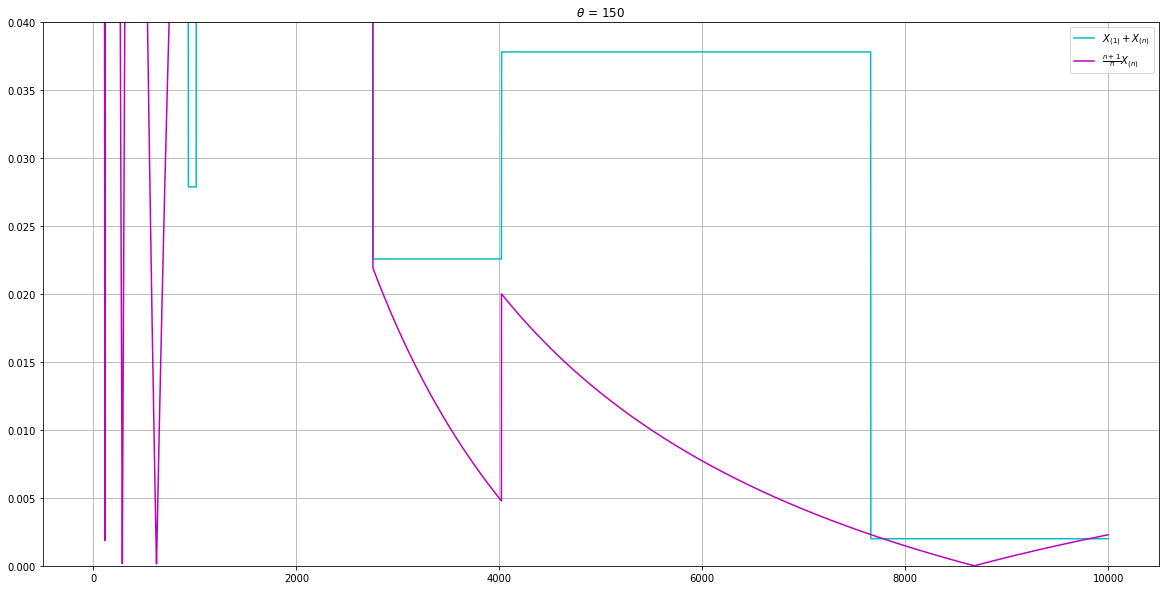

Sample: [ 38.39265382  88.04764415 142.52621553 ... 103.16329011 164.43257795
  58.62731551]


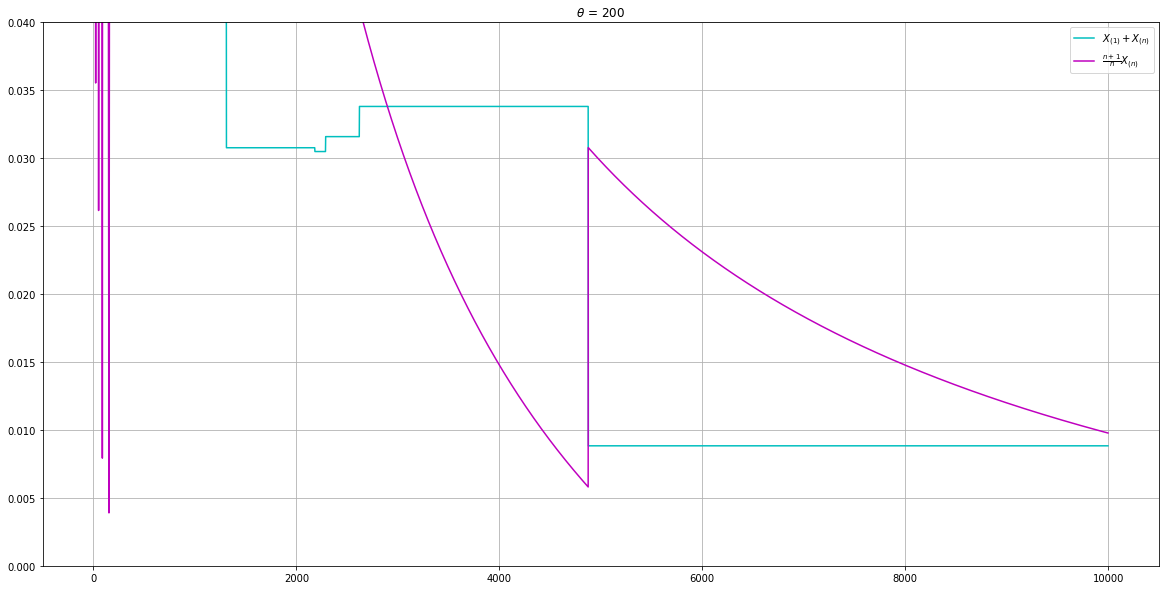

Sample: [174.51515271 245.44960878  83.48158719 ... 111.08133491 217.64281431
 176.60846998]


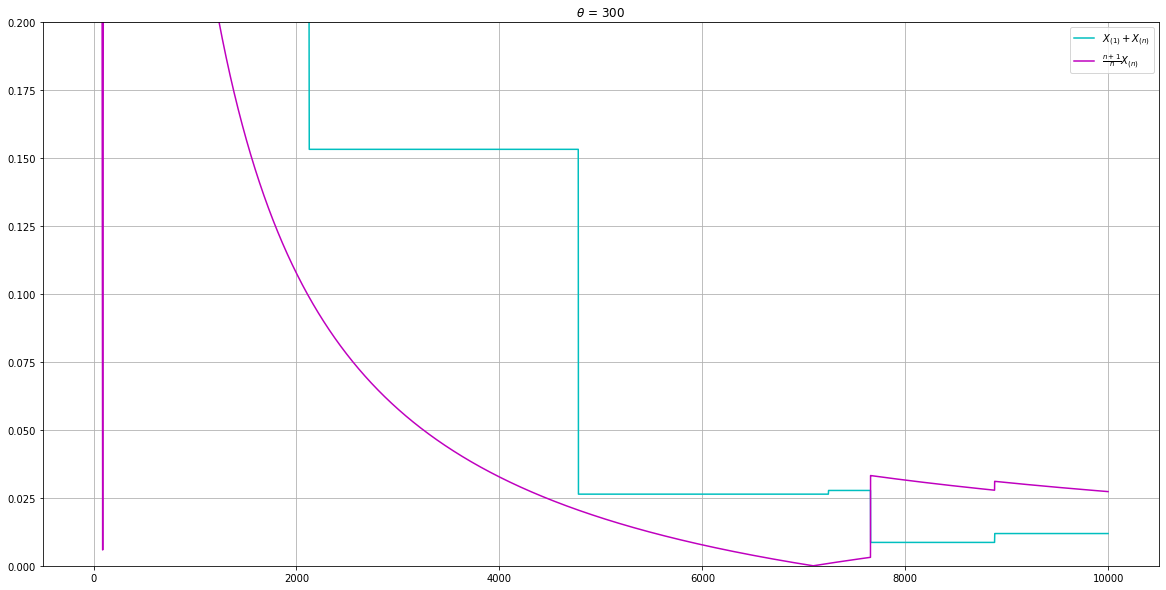

Sample: [288.19004435 425.96395119 350.24269207 ...  44.81948788 455.70174081
 241.43990157]


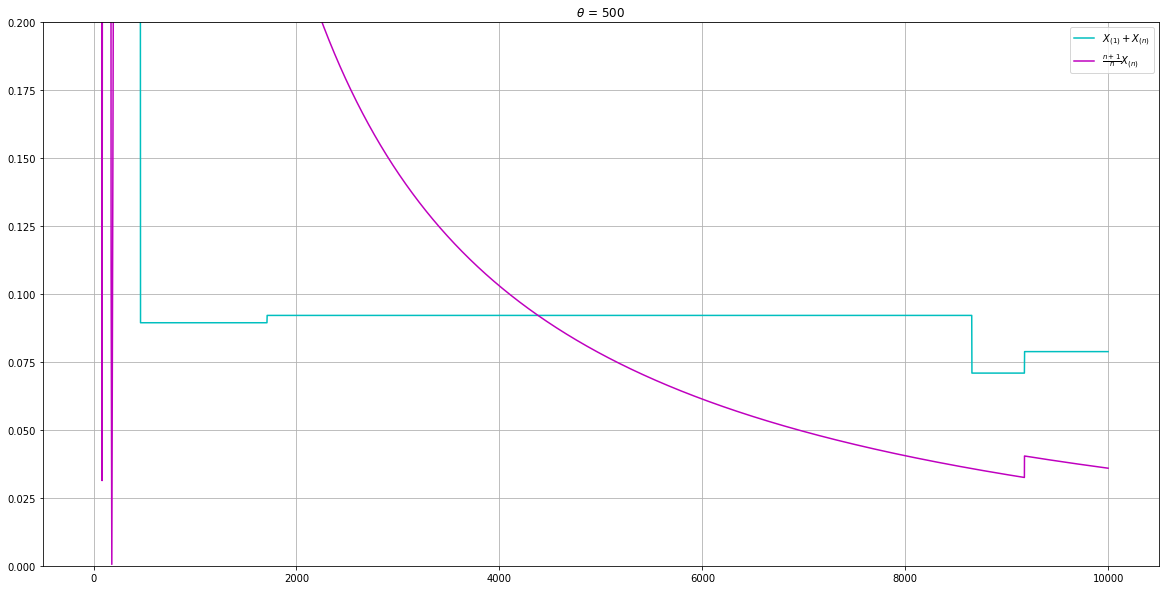

Sample: [836.28219426 463.98225629 351.81466623 ... 718.30893682 538.17175755
 177.66605841]


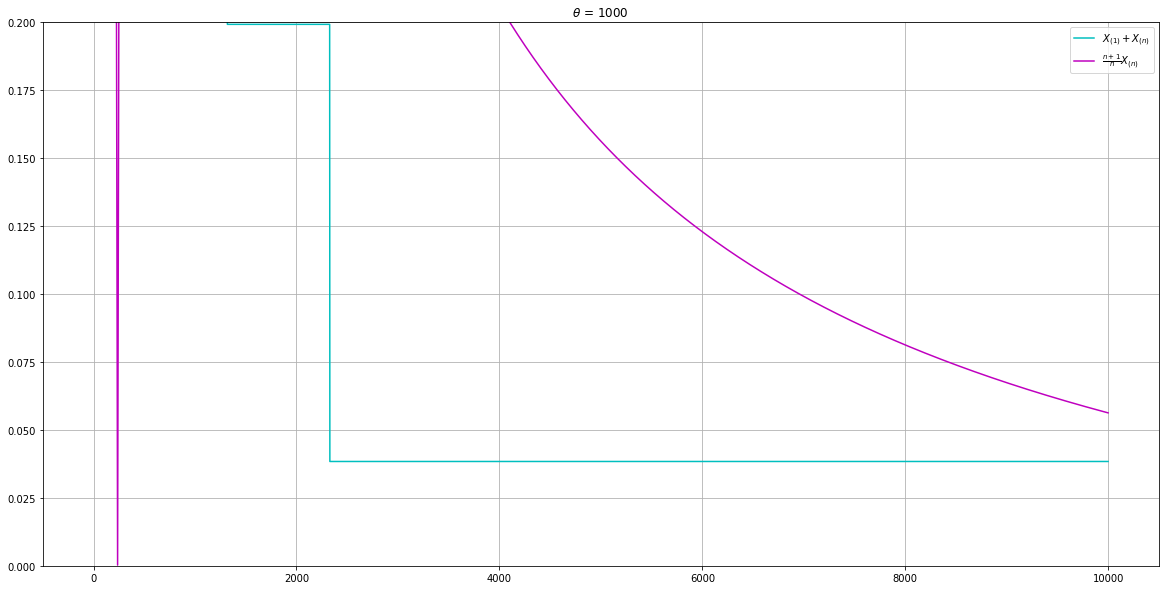

In [105]:
thetas = [10, 75, 100, 125, 150, 200, 300, 500, 1000]
for theta in thetas:
    est = estimates(theta)
    plt.figure(figsize=(20, 10))
    if theta < 300:
        plt.ylim(0, 0.04)
    else:
        plt.ylim(0, 0.2)
    plt.plot(np.abs(est[3] - theta), 'c', label=r'$X_{(1)} + X_{(n)}$')
    plt.plot(np.abs(est[4] - theta), 'm', label=r'$\frac{n+1}{n}X_{(n)}$')
    plt.title(r'$\theta$ = ' + str(theta))
    plt.legend()
    plt.grid()
    plt.show()

Получили, что самыми лучшими оценками являются несмещенные и состоятельные $\frac{n+1}{n}X_{(n)}$ и $X_{(1)} + X_{(n)}$, но сложно сказать, какая из них лучше.